# Student Feedback Analysis Report


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS



In [2]:
# 📂 Load Dataset
# ============================
# Upload your Google Form CSV here
from google.colab import files
uploaded = files.upload()


Saving student_feedback.csv to student_feedback.csv


In [3]:
# Replace with the correct filename after upload
df = pd.read_csv("student_feedback.csv")

df = df.drop(columns=["Unnamed: 0"])

aspects = [col for col in df.columns if col != "Student ID"]

df.head()

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [4]:
df[aspects].describe()

,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


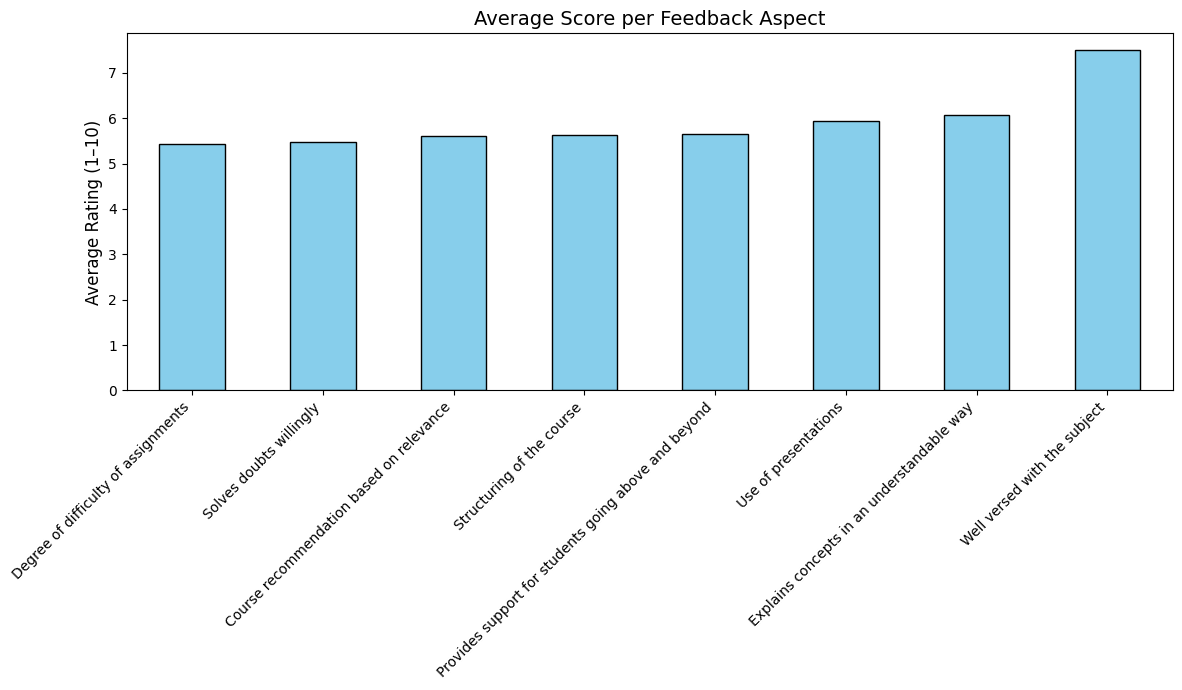

In [5]:
avg_scores = df[aspects].mean().sort_values()

plt.figure(figsize=(12,7)) # Increased figure size
avg_scores.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Score per Feedback Aspect", fontsize=14) # Increased title font size
plt.ylabel("Average Rating (1–10)", fontsize=12) # Increased label font size
plt.xticks(rotation=45, ha='right', fontsize=10) # Adjusted rotation and alignment for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##Insights from Average Scores

*   **Observation:** The bar chart shows the average ratings (1–10) for different feedback aspects.
*   **Key Points:** "Well versed with the subject" has the highest average score, while "Degree of difficulty of assignments" and "Solves doubts willingly" have the lowest.
*   **Insight:** Students highly value the instructor's subject knowledge, but assignments and doubt-solving support are perceived as weaker areas.


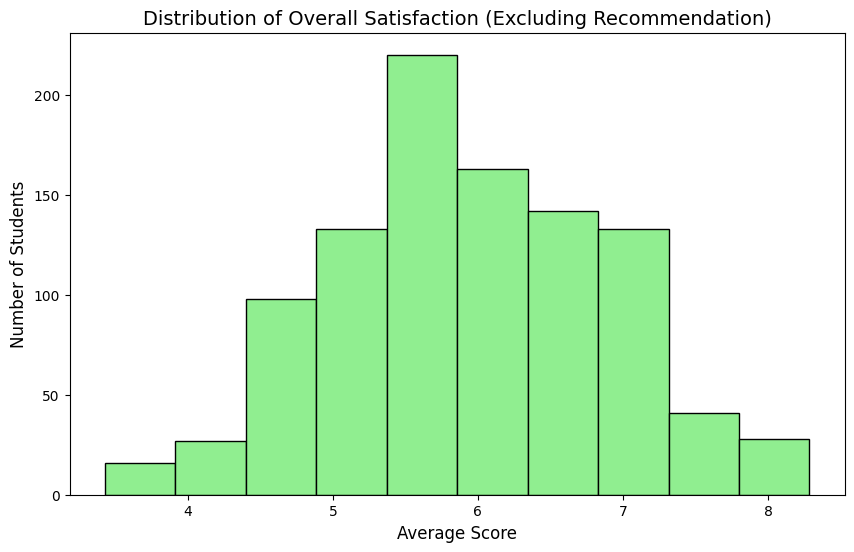

In [6]:
df["Overall_Score_excl_rec"] = df[aspects[:-1]].mean(axis=1)

plt.figure(figsize=(10,6)) # Increased figure size
plt.hist(df["Overall_Score_excl_rec"], bins=10, edgecolor="black", color="lightgreen")
plt.title("Distribution of Overall Satisfaction (Excluding Recommendation)", fontsize=14) # Increased title font size
plt.xlabel("Average Score", fontsize=12) # Increased label font size
plt.ylabel("Number of Students", fontsize=12) # Increased label font size
plt.show()

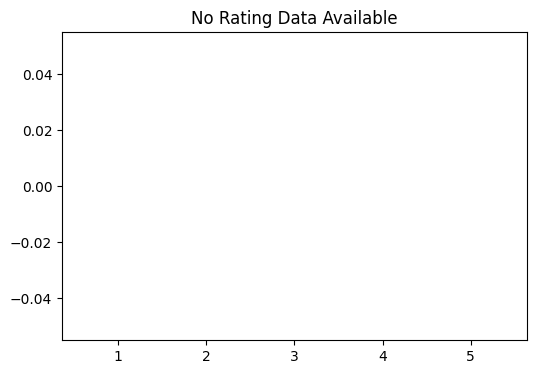

In [7]:
# ⭐ Rating Analysis
# ============================
plt.figure(figsize=(6,4))
if 'rating' in df.columns and not df['rating'].dropna().empty:
    sns.countplot(x='rating', data=df, palette="viridis")
    plt.title("Distribution of Event Ratings")
else:
    plt.bar([1,2,3,4,5], [0,0,0,0,0], color="lightgrey")
    plt.title("No Rating Data Available")
plt.show()

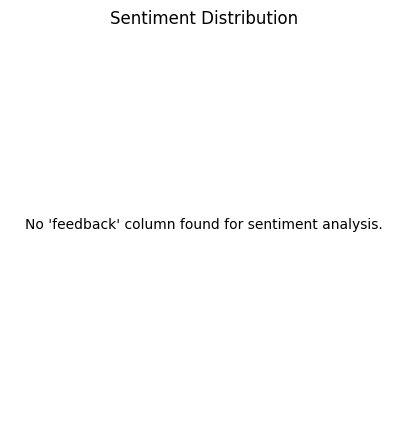

In [8]:
# 💬 Sentiment Analysis
# ============================
def get_sentiment(text):
    if pd.isnull(text): return "Neutral"
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

if 'feedback' in df.columns:
    df['sentiment'] = df['feedback'].apply(get_sentiment)
    sentiment_counts = df['sentiment'].value_counts()
else:
    sentiment_counts = pd.Series({"Positive":0, "Negative":0, "Neutral":0})

plt.figure(figsize=(5,5))
# Check if sentiment_counts is empty before plotting
if not sentiment_counts.empty and sentiment_counts.sum() > 0:
    sentiment_counts.plot(
        kind='pie',
        autopct='%1.1f%%',
        colors=['lightgreen','lightcoral','lightgrey']
    )
    plt.title("Sentiment Distribution")
    plt.ylabel("")
    plt.tight_layout()
else:
    plt.text(0.5, 0.5, "No 'feedback' column found for sentiment analysis.",
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.title("Sentiment Distribution")
    plt.axis('off') # Hide axes if no data
plt.show()

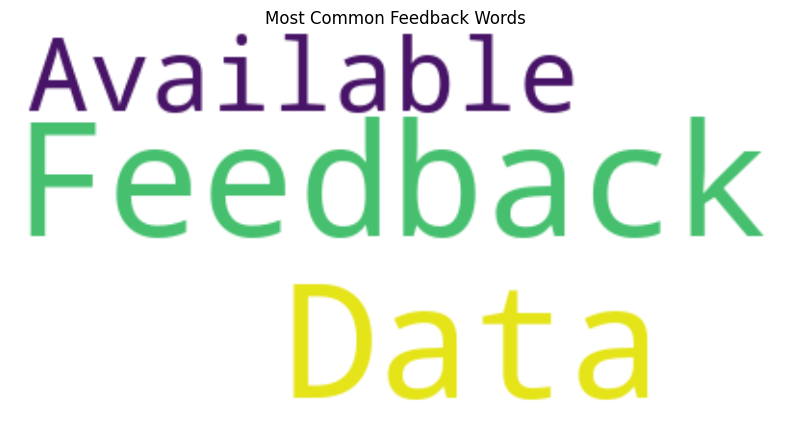

In [ ]:
# ☁️ Word Cloud
# ============================
if 'feedback' in df.columns and not df['feedback'].dropna().empty:
    text = " ".join(str(comment) for comment in df['feedback'].dropna())
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)
else:
    wordcloud = WordCloud(background_color="white").generate("No Feedback Data Available")

plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Feedback Words")
plt.tight_layout()
plt.show()


## Insights from Overall Satisfaction Distribution

*   **Observation:** The histogram shows the distribution of overall satisfaction scores.
*   **Key Points:** Most scores are concentrated between 5.5 and 6.5, indicating moderate satisfaction.
*   **Insight:** The majority of students are moderately satisfied, with fewer students being extremely satisfied or dissatisfied

> Add blockquote



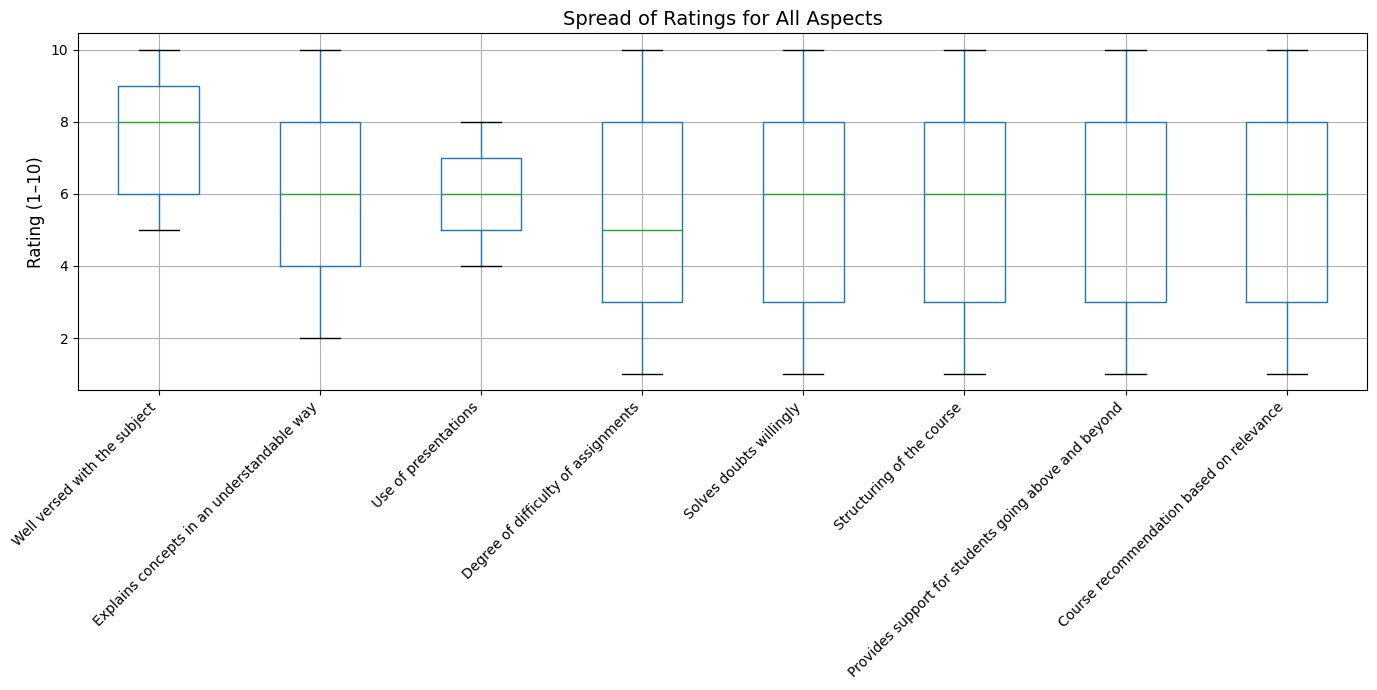

In [ ]:
plt.figure(figsize=(14,7)) # Increased figure size
df[aspects].boxplot()
plt.title("Spread of Ratings for All Aspects", fontsize=14) # Increased title font size
plt.ylabel("Rating (1–10)", fontsize=12) # Increased label font size
plt.xticks(rotation=45, ha='right', fontsize=10) # Adjusted rotation and alignment for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Insights from Spread of Ratings (Boxplots)

*   **Observation:** The boxplot shows the spread of ratings for all aspects.
*   **Key Points:** "Well versed with the subject" has a smaller spread, indicating more consistent high ratings. Other aspects have wider spreads, showing more variation in student opinions.
*   **Insight:** While there is strong agreement on subject knowledge, perceptions of other aspects like teaching methods and support vary more widely among students.

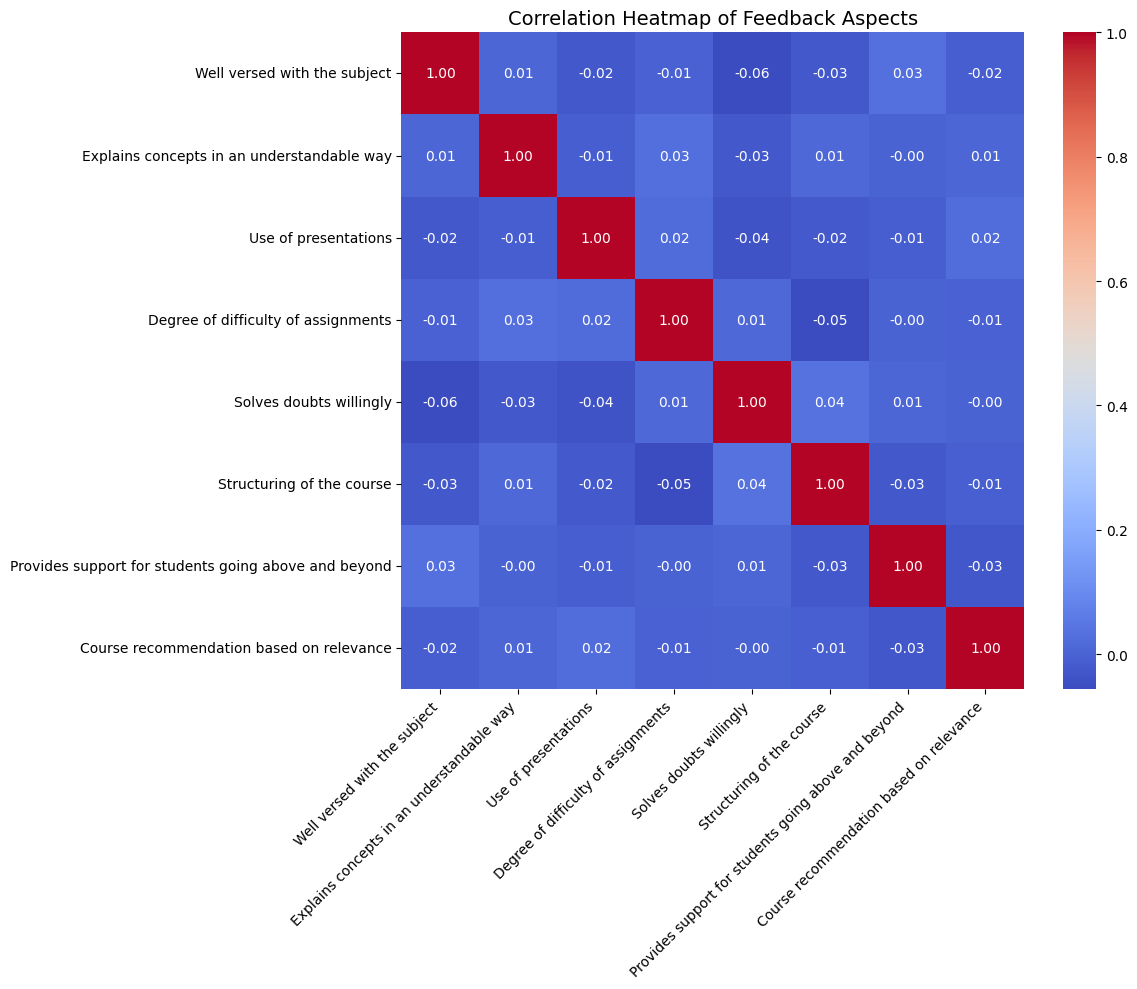

In [9]:
corr = df[aspects].corr()

plt.figure(figsize=(12,10)) # Increased figure size
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10}) # Adjusted annotation font size
plt.title("Correlation Heatmap of Feedback Aspects", fontsize=14) # Increased title font size
plt.xticks(rotation=45, ha='right', fontsize=10) # Adjusted rotation and alignment
plt.yticks(fontsize=10) # Adjusted font size
plt.tight_layout() # Adjust layout
plt.show()

## Insights from Correlation Heatmap

*   **Observation:** The heatmap shows the correlations between different feedback aspects.
*   **Key Points:** All correlation coefficients are very low (close to 0).
*   **Insight:** There is little to no linear relationship between different feedback aspects, suggesting students judge each aspect independently.

## Key Recommendations for Event Organizers

Based on the analysis, here are some key recommendations:

*   **Leverage Instructor's Subject Knowledge:** Continue to highlight the instructor's expertise as it is highly valued by students.
*   **Improve Assignment Design and Support:** Review the difficulty and clarity of assignments and enhance the support provided for doubt-solving. Consider offering more resources or alternative approaches to cater to diverse learning needs.
*   **Address Varied Perceptions of Teaching Methods:** Explore different teaching and presentation styles to better engage all students. Gathering more specific feedback on what works well and what doesn't can be helpful.
*   **Focus on Targeted Improvements:** Since feedback aspects are independent, focus improvement efforts on specific areas identified as weaker rather than expecting improvements in one area to automatically impact others.
*   **Gather More Detailed Feedback:** Implement open-ended questions in future feedback forms to collect qualitative data that can provide deeper insights into the reasons behind student ratings.

In [10]:
# 📊 Example Insights
# ============================
print("🔹 Average rating across all events:", round(df['rating'].mean(),2) if 'rating' in df.columns else "N/A")
print("🔹 Most common sentiment:", df['sentiment'].mode()[0] if 'feedback' in df.columns else "N/A")
print("🔹 Total responses collected:", len(df))

🔹 Average rating across all events: N/A
🔹 Most common sentiment: N/A
🔹 Total responses collected: 1001


In [12]:
# Example of how to export the DataFrame to a CSV file
df.to_csv('student_feedback_analyzed.csv', index=False)